비지도학습

k평균 알고리즘
  - 유클리드 거리를 통한 유사성 측정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [6]:
filepath = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/14%EC%A3%BC%EC%B0%A8/data_clustering.txt'
# 데이터 로드
X = np.loadtxt(filepath, delimiter=',')
X[:3]

array([[2.08, 1.05],
       [2.05, 7.7 ],
       [4.53, 5.49]])

In [7]:
# 클러스터의 수
nnum_cluster = 5

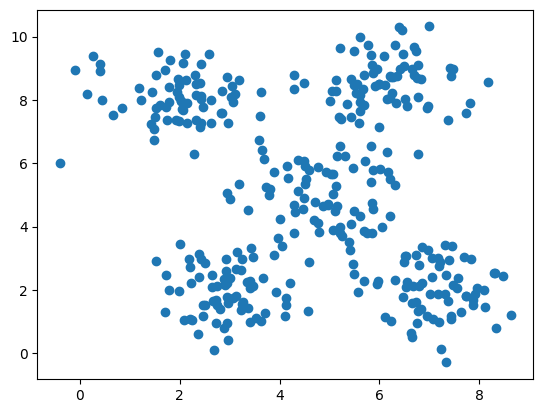

In [8]:
# 데이터 시각화
plt.scatter(X[:,0], X[:,1])
plt.show()

In [9]:
kmeans = KMeans(n_clusters=nnum_cluster)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [12]:
# 경계를 그리기위한포인트 그리드를 정의
x_min,x_max = X[:,0].min() -1, X[:,0].max()+1
y_min,y_max = X[:,1].min() -1, X[:,1].max()+1
x_vals,y_vals =  np.meshgrid(np.arange(x_min,x_max), np.arange(y_min, y_max)  )

In [30]:
# 그리드의 모든 포인트에 대한 출력 레이블 예측
output = kmeans.predict( np.c_[x_vals.ravel(), y_vals.ravel()])
output

array([2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       4, 4, 0, 0, 0, 0, 3, 3, 3, 2, 4, 4, 4, 4, 4, 4, 0, 0, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 0, 3, 3, 3, 3, 3, 3, 4, 4, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
# np.c_[x_vals.ravel(), y_vals.ravel()] 를 아래와 같이도 사용가능
# import pandas as pd
# pd.DataFrame(zip(x_vals.ravel(), y_vals.ravel())).to_numpy()

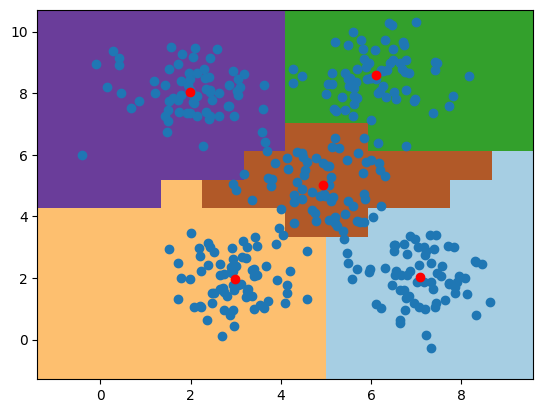

In [35]:
# 서로다른 영역을 그리고 색을 칠한다
output =  output.reshape(x_vals.shape)
plt.imshow(output, interpolation='nearest',extent=(x_vals.min(), x_vals.max(),y_vals.min(),y_vals.max() ),
           cmap=plt.cm.Paired,
           aspect='auto',
           origin='lower'
  )
# 입력 포인트를 overray한다
plt.scatter(X[:,0], X[:,1])

# 클러스터 중심을 그려본다
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], color='red')

plt.show()

평균이동 알고리즘으로 군집수 추정(예측)
  - 기본데이터가 표준 확률 분포를 따른다고 가정 - 모수알고리즘
  - 비모수 알고리즘
  - 객체탐지나 실시간 데이터 분석 같은 분야에 적용

In [40]:
from sklearn.cluster import MeanShift, estimate_bandwidth
# 평균이동 알고리즘에 적용할 대역을 지정 estimate_bandwidth

In [38]:
X = np.loadtxt(filepath,delimiter=',')
X[:3]

array([[2.08, 1.05],
       [2.05, 7.7 ],
       [4.53, 5.49]])

In [47]:
# X의 대역폭 추정
# quantile 대역폭 추정 방법에 영향을 줌, 클수록 대역폭이증가,클러스터가 줄어든다
bandwidth_X = estimate_bandwidth(X,quantile=0.1,n_samples = len(X))

In [48]:
# 이동평균 MeanShift를 사용해서 평균 이동 클러스트링 모델훈련
meanshfit_model= MeanShift(bandwidth=bandwidth_X,bin_seeding=True)
meanshfit_model.fit(X)

MeanShift(bandwidth=1.3044799765090382, bin_seeding=True)

In [49]:
cluster_centers= meanshfit_model.cluster_centers_
cluster_centers

array([[2.95568966, 1.95775862],
       [7.20690909, 2.20836364],
       [2.17603774, 8.03283019],
       [5.97960784, 8.39078431],
       [4.99466667, 4.65844444]])

In [51]:
# 클러스터 수 출력
labels = meanshfit_model.labels_
np.unique(labels)

array([0, 1, 2, 3, 4])

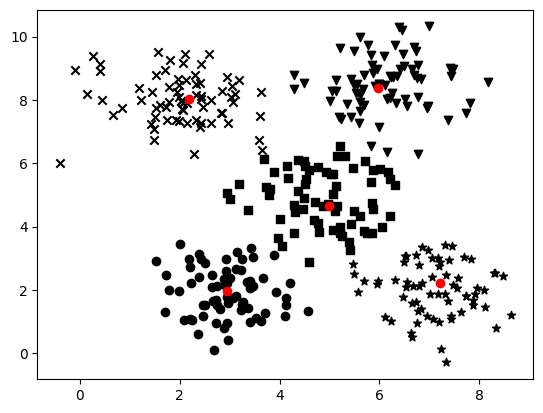

In [55]:
# 포인트와 클러스터 중심
markers = 'o*xvs'
for i,mark in  zip(range(len(labels)),markers):
  plt.scatter(X[labels == i,0], X[labels == i,1],marker=mark,color='black')
  # 클러스터의 중심점
  cluser_center = cluster_centers[i]
  plt.scatter(cluser_center[0],cluser_center[1],marker='o',color='red')

클러스터의 품질 평가는 실루엣 점수로 평가
  - 데이터포인트와 자체 클러스터의 유사성을 다른 클러스터와 비교해서 측정하는 지표
  - p : 데이터 포인트가 속하지 않은 가장 가까운 클러스터의 포인트들까지의 평균 거리
  - q :  자체 클러스터의 모든 포인트에 대한 평균 거리(클러스터 내부)
  - 실루엣점수 : (p-q) / max(p,q)
  - 1에 가까우면 잘 클러스터링
  - -1에 가까우면 분류에 사용되는 변수가 잡음이 많고 신호를 많이 포함하지 않는다

In [56]:
from sklearn import metrics

In [62]:
X = np.loadtxt(filepath,delimiter=',')
# 최적의 클러스터를 찾기위해
scores = []
values = np.arange(2,10)
# 클러스터를 변경하면서 k-mean모델을 생성하고 점수 기록
for num_cluster in values:
  #모델 훈련
  kmeans = KMeans(n_clusters = num_cluster,n_init=10)
  kmeans.fit(X)
  score = metrics.silhouette_score(X,kmeans.labels_,sample_size=len(X) )
  # 현재 실루엣 출력
  print(f"number of cluster = {num_cluster}, silhouette_score:{score}")
  scores.append(score)

number of cluster = 2, silhouette_score:0.4912185214568004
number of cluster = 3, silhouette_score:0.4929056744601706
number of cluster = 4, silhouette_score:0.5139269440580392
number of cluster = 5, silhouette_score:0.5906519837897813
number of cluster = 6, silhouette_score:0.5274764775436476
number of cluster = 7, silhouette_score:0.4704629176143082
number of cluster = 8, silhouette_score:0.43047456791858124
number of cluster = 9, silhouette_score:0.39071172105201313


In [64]:
max(scores), np.argmax(scores)

(0.5906519837897813, 3)

가우시안 혼합모델(GMM)
  - 혼합모델의 종류가 가우시안 모델
  - 혼합모델 : 데이터가 여러구성 요소분포에 의해 처리된다고 가정하는 확률 밀도 모델유형
  - 이때 분포가 가우시안 모델(정규분포와 유사)
  - 미국에 모든 사람의 쇼핑습관을 모델링
    - 대륙전체를 모델링->각 대륙별 단일 모델->쇼핑패턴은 나라마다 다르다 -> 각 나라별 쇼핑 방식 행동
    - 혼합모델 : 개별국가의 쇼핑습관을 모델링, 모두 혼합


In [66]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn import datasets

In [69]:
# iris데이터로드
iris = datasets.load_iris()
X,y = datasets.load_iris(return_X_y=True)

In [71]:
skf = StratifiedKFold(n_splits=5)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [73]:
num_classes =  len(np.unique(y_train))

In [74]:
# GMM 생성
classifier = GaussianMixture(n_components=num_classes)

In [76]:
# GMM평균 초기화
classifier_means =  np.array([x_train[y_train == i].mean(axis=0) for i in range(num_classes)])
classifier_means

array([[5.02051282, 3.4025641 , 1.46153846, 0.24102564],
       [5.88648649, 2.76216216, 4.21621622, 1.32432432],
       [6.63863636, 2.98863636, 5.56590909, 2.03181818]])

In [77]:
# 훈련
classifier.fit(x_train)

GaussianMixture(n_components=3)

In [83]:
y_test_pred = classifier.predict(x_test)
sum(y_test_pred == y_test) / len(y_test)

0.2

In [86]:
len(x_test),len(y_test_pred)

(30, 30)